In [1]:
#Importing pandas package which is the main package
import pandas as pd
#Importing the supporting numpy package to perform mathematical computations if any
import numpy as np
#Importing the packages that support visualization
import matplotlib.pyplot as plt
import seaborn as sns

#### This notebook is the final version after doing a lot of small checks

In [2]:
#Step 1 : Import/Read the CSV file provided
data = pd.read_csv('loan.csv')

C:\Users\Suraj MU\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#Looking at the Sample Rows
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


### Data is desgined in such a way that, each record/row is about a customer/loan applicant, whereas each column denotes the behavior of a customer

In [4]:
#Get to know how many rows and columns are there
data.shape

(39717, 111)

#### The y-variable is loan_status and is the main variable that needs to be analysed with other x variables

In [5]:
data['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

### We observe there are lot of columns in this dataset, best approach would be to go through the data dictionary and identify logical/ business/ data quality related reasons to eliminate redundant columns before starting the analysis, so as to arrive at a Analytical Dataset to perform the analysis

In [6]:
#Checking Null Value Counts in each column
data.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


### 1. We observe that a lot of columns have null values entirely, hence we can eliminate those columns (We can define a % of missing values logic as well, but it is straightforward in this dataset

In [7]:
#Visited Pandas dropna documentation to understand its parameters with examples : https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html
#Condition specified below is to drop columns which have NAs/Nulls Completely
data1 = data.dropna(how='all',axis=1)

In [8]:
#Re checking the shape of the dataframe again, we were able eliminate close to 54 columns with the above condition
data1.shape

(39717, 57)

In [9]:
#Checking the sum of NA/NULLs again
data1.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [10]:
#We again observe that there are few columns with NA/NULL values close to the length of the column, removing them manually
data2 = data1.drop(['mths_since_last_delinq','mths_since_last_record','next_pymnt_d'], axis = 1)

In [11]:
#Checking Shape of dataframe again (Removed 3 columns manually)
data2.shape

(39717, 54)

### 2. After removing columns which have NULL values entirely, it is now time to remove unecessary columns that does not fit our use case
#### 1. {id, member_id} - These are random numbers used to identify the individual, will not help in the analysis
#### 2. {initial_list_status,out_prncp, out_prncp_inv, total_rec_prncp, total_rec_int, total_rec_late_fee, recoveries, collection_recovery_fee,  last_pymnt_d, last_pymnt_amnt, last_credit_pull_d, collections_12_mths_ex_med, funded_amt, funded_amt_inv, installment, total_pymnt, total_pymnt_inv, revol_bal, revol_util, pub_rec, pub_rec_bankruptcies, delinq_2yrs, total_acc, open_acc, earliest_cr_line, inq_last_6mths} - These paramters are absent during the application or has to be availed from the credit bureau, some columns were straight forward and few columns were being selected basis the PPT shared during the live class, in the absence of domain knowledge the PPT helped
#### 3. {url} - Its the url for the LC Page listing data, will not help in the analysis
#### 4. {title, desc} - Can use the purpose column, easily categorized, its redundant
#### 4. {emp_title} - This is a descriptive column, with a lot of messy values(For ex: US Army, U.S. Army, US ARMY) in terms of additional special characters,Short Forms and long forms, different case for the same string, its also mentioned that the emp_title shall replace names post Sep 23, 2013, going forward in the future also this column won't be useful, hence deleting this column, because even if it makes sense to the analysis and if some insights do come out of it, this wont be captured going forward

In [12]:
#Removing additional columns as they wont be available during the loan application process and wont help us understand about a loan defaulter
data3 = data2.drop(['id','member_id','url','desc','title','initial_list_status','out_prncp','out_prncp_inv',
                   'total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee',
                   'last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','collections_12_mths_ex_med','funded_amnt',
                   'funded_amnt_inv','installment','total_pymnt','total_pymnt_inv','emp_title','revol_bal','revol_util',
                   'pub_rec','pub_rec_bankruptcies','delinq_2yrs','total_acc','open_acc','earliest_cr_line','inq_last_6mths'], axis = 1)

In [13]:
#Rechecking the Shape
data3.shape

(39717, 22)

### 3. Removing columns that are single valued as they don't add value to our analysis

In [14]:
#Checking all the columns which are single valued columns
data3.columns[data3.nunique() <= 1]

Index(['pymnt_plan', 'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'],
      dtype='object')

In [15]:
#Dropping the above columns
data4 = data3.drop(['pymnt_plan', 'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'], axis=1)

In [16]:
#Checking Shape again
data4.shape

(39717, 15)

### 4. Our goal is to identify factors influencing a loan default and hence we are not interested in the records where the individuals are still paying currently 

In [17]:
#Checking how many rows of each of the loan statuses are present
data4['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

#### <i> If we look at the result above, we see that majority of records are of the 'Fully Paid' status, that of the Charged Off status has less values already, in our use case Charged Off status is the important status and we are looking for factors influencing them, so we should take care so that we dont remove rows of the Charged Off status </i>

In [18]:
#Retaining rows which has a Full Paid status or Charged Off status
data5 = data4[(data4['loan_status']=='Fully Paid') | (data4['loan_status']=='Charged Off')]

In [19]:
#Rechecking the shape
data5.shape

(38577, 15)

In [20]:
#Checking the sum of NA/NULLs again
data5.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
grade                     0
sub_grade                 0
emp_length             1033
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
zip_code                  0
addr_state                0
dti                       0
dtype: int64

#### We observe that in the latest altered dataset, missing values are present in emp_length column

In [21]:
#Checking how many values in each of the loan status
data5['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

##### There are 1033 missing rows in emp_length column, trying to remove this

In [22]:
data6 = data5[~data5['emp_length'].isnull()]

In [23]:
data6.shape

(37544, 15)

In [24]:
#Checking how many values in each of the loan status
data6['loan_status'].value_counts()

Fully Paid     32145
Charged Off     5399
Name: loan_status, dtype: int64

##### After removing NULLs in the emp_length column, didnt end up removing a lot of rows of the Charged off Segment

In [25]:
#Rechecking the NULLs
data6.isnull().sum()

loan_amnt              0
term                   0
int_rate               0
grade                  0
sub_grade              0
emp_length             0
home_ownership         0
annual_inc             0
verification_status    0
issue_d                0
loan_status            0
purpose                0
zip_code               0
addr_state             0
dti                    0
dtype: int64

#### Have removed columns and rows that does not fit the context of the problem

## Univariate Analysis
### (We can study each of the columns and also perform necessary alterations to the column's data types etc)

##### 1. Loan Amount

In [26]:
#Checking Data type
data6['loan_amnt'].dtype

dtype('int64')

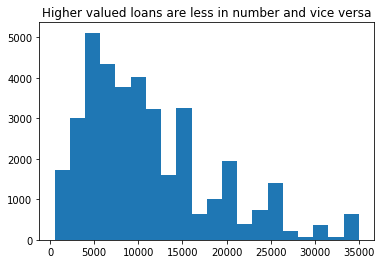

In [27]:
#Plotting a Histogram
plt.hist(data6['loan_amnt'], bins = 20)
plt.title('Higher valued loans are less in number and vice versa')
plt.show()

##### 2. Term

In [28]:
#Checking Data type
data6['term'].dtype

dtype('O')

In [29]:
#Looking at unique values in the column
data6['term'].value_counts()

 36 months    28287
 60 months     9257
Name: term, dtype: int64

In [30]:
data7 = data6

In [31]:
data7['term_new'] = data7['term']

C:\Users\Suraj MU\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [32]:
#Converting values in this column to int
data7.term_new = data7.term_new.apply(lambda x:x.replace(" months",""))

C:\Users\Suraj MU\Anaconda3\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


[Text(0.5, 1.0, 'Most common term for loan payment is 3 years')]

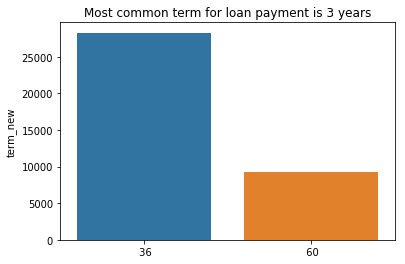

In [33]:
df = data7['term_new'].value_counts()
sns.barplot(df.index, df).set(title='Most common term for loan payment is 3 years')

In [34]:
data7 = data7.drop(['term'], axis=1)

#### 3. Interest rate

In [35]:
data7['int_rate'].dtype

dtype('O')

In [36]:
data7['int_rate'].value_counts()

10.99%    891
11.49%    766
7.51%     756
13.49%    736
7.88%     701
7.49%     629
9.99%     570
7.90%     552
11.71%    542
5.42%     524
11.99%    469
10.37%    451
12.69%    440
8.49%     419
6.03%     413
12.99%    397
12.42%    393
10.65%    392
5.79%     390
11.86%    383
7.29%     379
6.62%     376
8.90%     371
9.63%     368
10.59%    348
14.27%    337
9.91%     331
5.99%     329
12.53%    327
7.14%     327
         ... 
20.20%      2
14.25%      2
14.07%      2
14.70%      2
15.83%      2
14.62%      2
15.01%      2
15.38%      2
14.88%      2
17.90%      2
17.03%      2
17.15%      2
17.54%      1
16.01%      1
16.20%      1
14.67%      1
24.40%      1
20.52%      1
13.84%      1
22.64%      1
16.15%      1
18.72%      1
16.96%      1
17.34%      1
16.71%      1
21.48%      1
17.46%      1
17.44%      1
22.94%      1
18.36%      1
Name: int_rate, Length: 370, dtype: int64

In [37]:
data8 = data7

In [38]:
data8['int_rate_new'] = data8.int_rate.apply(lambda x:x.replace("%",""))

In [39]:
data8 = data8.drop(['int_rate'], axis=1)

In [40]:
data8.int_rate_new = data8.int_rate_new.astype('float64')

In [41]:
data8.int_rate_new.dtype

dtype('float64')

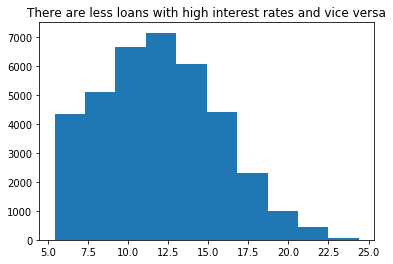

In [42]:
plt.hist(data8['int_rate_new'])
plt.title('There are less loans with high interest rates and vice versa')
plt.show()

In [43]:
data8['int_rate_new'].describe()

count    37544.000000
mean        11.963319
std          3.683012
min          5.420000
25%          8.940000
50%         11.830000
75%         14.420000
max         24.400000
Name: int_rate_new, dtype: float64

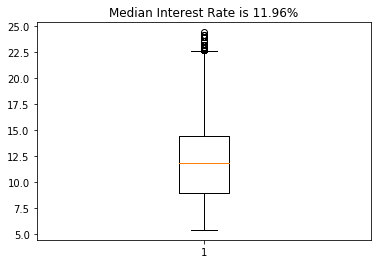

In [44]:
plt.boxplot(data8['int_rate_new'])
plt.title('Median Interest Rate is 11.96%')
plt.show()

#### 4. Grade

In [45]:
data8['grade'].value_counts()

B    11359
A     9660
C     7669
D     4979
E     2620
F      959
G      298
Name: grade, dtype: int64

[Text(0.5, 1.0, 'Grade B Loans are common')]

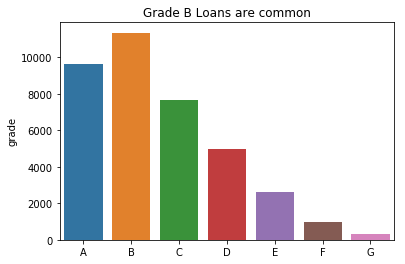

In [46]:
df1 = data8['grade'].value_counts().sort_index()
sns.barplot(df1.index, df1).set(title='Grade B Loans are common')

##### 5. Sub Grade

In [47]:
data8['sub_grade'].value_counts().sort_index()

A1    1052
A2    1441
A3    1741
A4    2792
A5    2634
B1    1722
B2    1944
B3    2746
B4    2388
B5    2559
C1    2014
C2    1899
C3    1458
C4    1176
C5    1122
D1     916
D2    1255
D3    1090
D4     905
D5     813
E1     711
E2     605
E3     504
E4     419
E5     381
F1     301
F2     228
F3     172
F4     148
F5     110
G1      93
G2      77
G3      45
G4      54
G5      29
Name: sub_grade, dtype: int64

[Text(0.5, 1.0, 'Distribution of Loans across Sub Grades')]

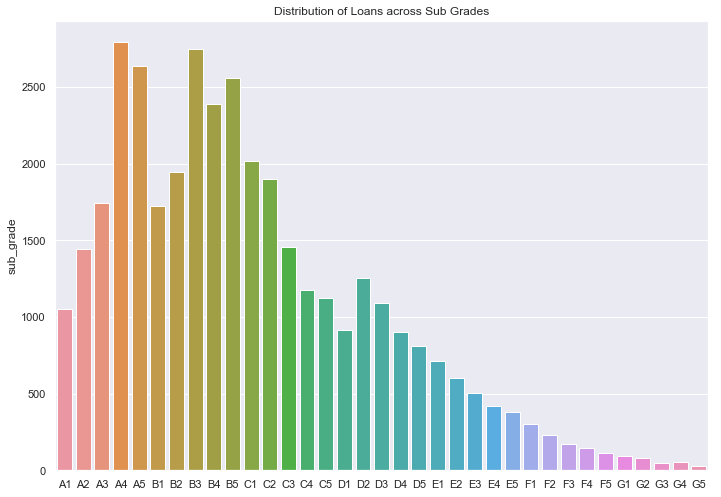

In [48]:
df2 = data8['sub_grade'].value_counts().sort_index()
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(df2.index, df2).set(title='Distribution of Loans across Sub Grades')

#### 6. Employment Length

In [49]:
data8['emp_length'].value_counts()

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

In [50]:
#Creating a dummy dictionary to convert string type values to int values
data_dict = {
    '< 1 year' : 0,
    '1 year' : 1,
    '2 years' : 2,
    '3 years' : 3,
    '4 years' : 4,
    '5 years' : 5,
    '6 years' : 6,
    '7 years' : 7,
    '8 years' : 8,
    '9 years' : 9,
    '10+ years' : 10
}

In [51]:
data8 = data8.replace({"emp_length": data_dict })

In [52]:
data8['emp_length'].value_counts()

10    8488
0     4508
2     4291
3     4012
4     3342
5     3194
1     3169
6     2168
7     1711
8     1435
9     1226
Name: emp_length, dtype: int64

In [53]:
df3 = data8['emp_length'].value_counts()

[Text(0.5, 1.0, 'Most of our Customers are employed for more than 10 Years')]

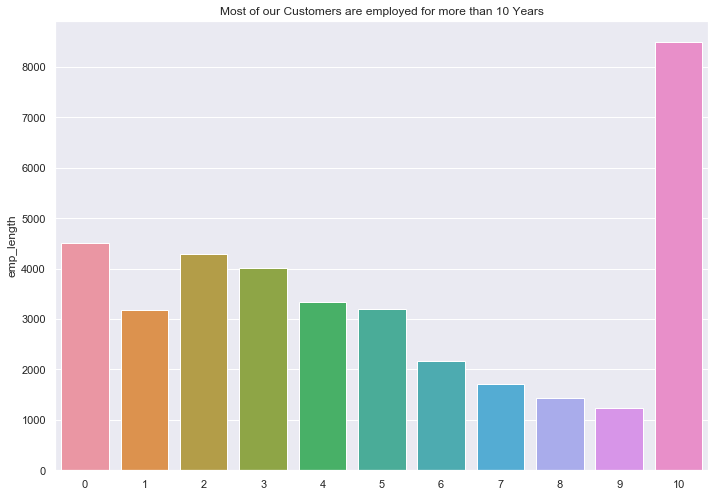

In [54]:
sns.barplot(df3.index, df3).set(title='Most of our Customers are employed for more than 10 Years')

#### 7. Home Ownership

In [193]:
data8['home_ownership'].value_counts(normalize=True)

RENT        0.481515
MORTGAGE    0.442015
OWN         0.073780
OTHER       0.002610
NONE        0.000080
Name: home_ownership, dtype: float64

##### We can see from the data distribution that most of our customers are either living in rented or mortgaged homes

#### 8. Annual Income

In [56]:
#There clearly are outliers in our data
data8.annual_inc.describe()

count    3.754400e+04
mean     6.940708e+04
std      6.467698e+04
min      4.000000e+03
25%      4.100000e+04
50%      6.000000e+04
75%      8.300000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [57]:
#Removing them using the 95% logic
data9 = data8[data8.annual_inc < data8.annual_inc.quantile(.95)]

In [58]:
data9['annual_inc'].describe()

count     35662.000000
mean      61428.911805
std       27736.943017
min        4000.000000
25%       40000.000000
50%       57000.000000
75%       78000.000000
max      141996.000000
Name: annual_inc, dtype: float64

In [59]:
data9['loan_status'].value_counts()

Fully Paid     30467
Charged Off     5195
Name: loan_status, dtype: int64

In [60]:
data8['loan_status'].value_counts()

Fully Paid     32145
Charged Off     5399
Name: loan_status, dtype: int64

#### We end up removing 200 rows from Charged Off status, should explore other techniques to remove outliers

In [61]:
#Removing them using the Mean +- 3SD logic
#https://stackoverflow.com/questions/23199796/detect-and-exclude-outliers-in-a-pandas-dataframe
data9 = data8[np.abs(data8['annual_inc']-data8['annual_inc'].mean()) <= (3*data8['annual_inc'].std())]

In [62]:
data9['loan_status'].value_counts()

Fully Paid     31900
Charged Off     5370
Name: loan_status, dtype: int64

##### We can use this technique as lesser rows are getting eliminated from the Charged Off Segment plus the outliers are removed too

In [63]:
data9['annual_inc'].describe()

count     37270.000000
mean      66413.381415
std       36394.965691
min        4000.000000
25%       41000.000000
50%       59113.000000
75%       82000.000000
max      262000.000000
Name: annual_inc, dtype: float64

C:\Users\Suraj MU\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


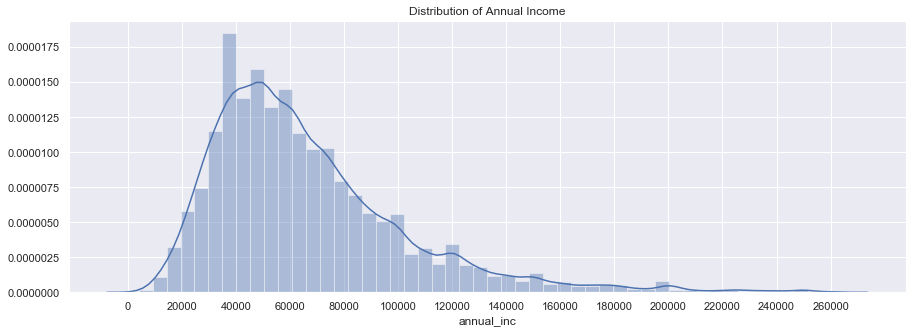

In [64]:
plt.figure(figsize=(15, 5))
sns.distplot(data9['annual_inc'], hist_kws={'log':False})
plt.xticks(np.arange(0, 262000, 20000))
plt.title('Distribution of Annual Income')
plt.show()

#### 9. Verification Status

In [65]:
data9['verification_status'].value_counts(normalize=True)

Not Verified       0.434907
Verified           0.312691
Source Verified    0.252401
Name: verification_status, dtype: float64

##### We observe that 56% of the records are Verified either by LC or Income Source

#### 10. Purpose

In [66]:
data9['purpose'].value_counts(normalize=True)

debt_consolidation    0.471532
credit_card           0.130668
other                 0.099061
home_improvement      0.073035
major_purchase        0.055433
small_business        0.045452
car                   0.038798
wedding               0.024309
medical               0.017440
moving                0.014677
vacation              0.009337
house                 0.009310
educational           0.008479
renewable_energy      0.002468
Name: purpose, dtype: float64

##### Lot of Customers actually apply loan for their debt consolidations

### 11. issue_d - The month which the loan was funded

In [67]:
data9['issue_d'].dtype

dtype('O')

In [68]:
#We have to change the data type to Date
data9.issue_d = pd.to_datetime(data9.issue_d, format='%b-%y')

In [69]:
data9['issue_d'].describe()

count                   37270
unique                     55
top       2011-12-01 00:00:00
freq                     1982
first     2007-06-01 00:00:00
last      2011-12-01 00:00:00
Name: issue_d, dtype: object

In [70]:
df4 = data9['issue_d'].value_counts().sort_index()

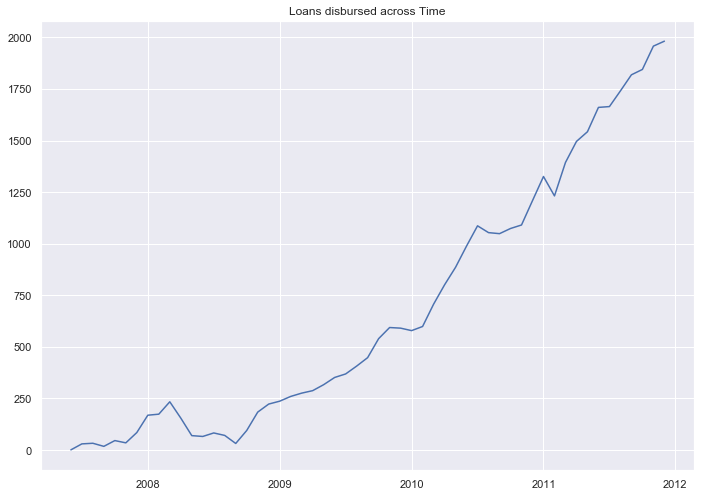

In [71]:
df4.plot(title='Loans disbursed across Time')

In [72]:
data9['issue_d_yr'] = data9['issue_d'].dt.year
data9['issue_d_mnth'] = data9['issue_d'].dt.month

C:\Users\Suraj MU\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Suraj MU\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


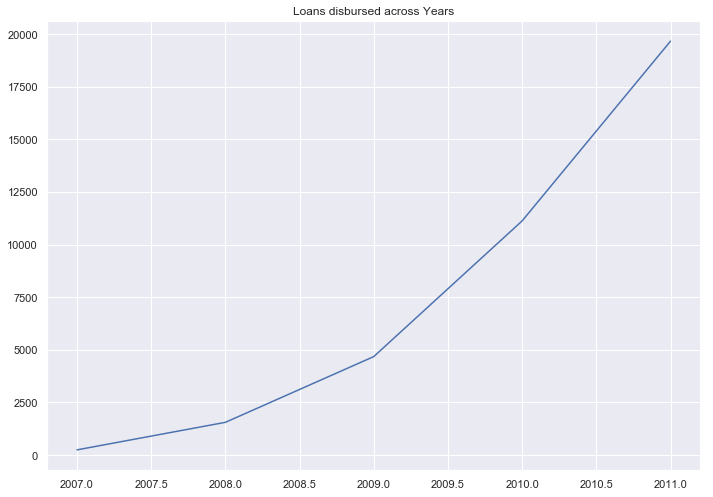

In [73]:
df5 = data9['issue_d_yr'].value_counts().sort_index()
df5.plot(title='Loans disbursed across Years')

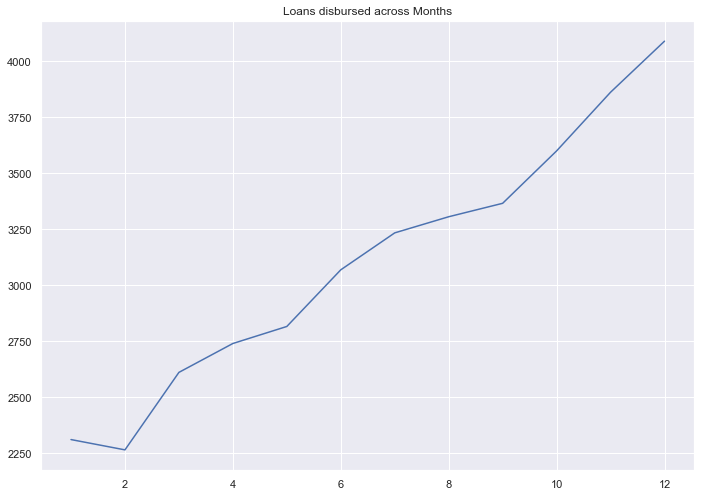

In [74]:
df6 = data9['issue_d_mnth'].value_counts().sort_index()
df6.plot(title='Loans disbursed across Months')

#### <i> Disbursing loans has inceased by great folds every year, starting from 2007 to almost 2012, and we see the no of loans being disbursed increases between Jan-Dec and Dec being the highest </i>

### 12. Zip Code - The first 3 numbers of the zip code provided by the borrower in the loan application.

In [75]:
data9['zip_code'].value_counts()

100xx    565
945xx    518
112xx    492
606xx    482
070xx    446
900xx    433
300xx    378
021xx    370
926xx    357
750xx    351
941xx    350
331xx    331
921xx    330
917xx    329
770xx    309
117xx    278
113xx    266
913xx    256
852xx    254
330xx    243
891xx    235
080xx    230
925xx    225
334xx    221
902xx    220
920xx    219
201xx    218
951xx    215
980xx    211
200xx    211
        ... 
383xx      1
834xx      1
386xx      1
473xx      1
044xx      1
523xx      1
465xx      1
469xx      1
090xx      1
522xx      1
479xx      1
373xx      1
372xx      1
369xx      1
353xx      1
007xx      1
833xx      1
397xx      1
789xx      1
772xx      1
375xx      1
408xx      1
575xx      1
556xx      1
736xx      1
673xx      1
689xx      1
669xx      1
289xx      1
747xx      1
Name: zip_code, Length: 821, dtype: int64

[Text(0.5, 1.0, 'Top 10 Pincodes')]

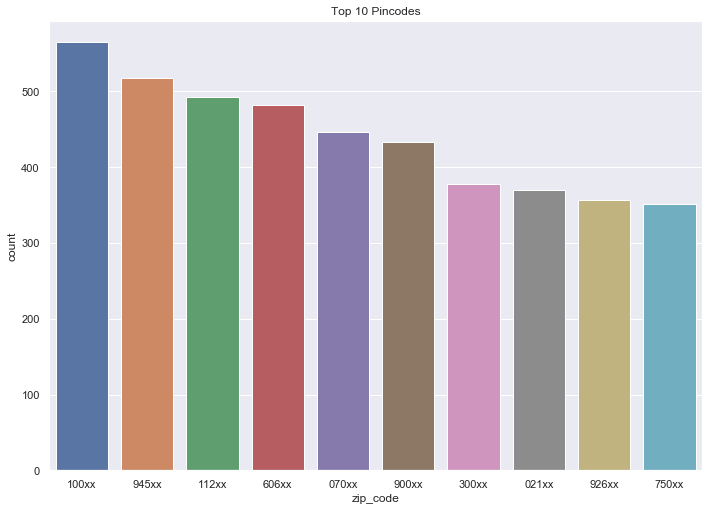

In [76]:
#Plotting the metric below, using the help from : https://stackoverflow.com/questions/32891211/limit-the-number-of-groups-shown-in-seaborn-countplot
sns.countplot(x='zip_code',data=data9,order=pd.value_counts(data9['zip_code']).iloc[:10].index).set(title='Top 10 Pincodes')

### 13. addr_state - The state provided by the borrower in the loan application

In [77]:
data9['addr_state'].value_counts()

CA    6725
NY    3566
FL    2671
TX    2585
NJ    1751
PA    1430
IL    1426
VA    1332
GA    1312
MA    1253
OH    1142
MD     993
AZ     800
WA     779
CO     735
NC     721
CT     696
MI     666
MO     643
MN     582
NV     461
SC     449
WI     425
OR     421
AL     415
LA     411
KY     307
OK     281
UT     246
KS     244
AR     227
DC     211
RI     190
NM     177
WV     164
HI     162
NH     155
DE     110
MT      77
WY      76
AK      75
SD      61
VT      53
MS      19
TN      17
IN       9
ID       6
NE       5
IA       5
ME       3
Name: addr_state, dtype: int64

[Text(0.5, 1.0, 'Top 10 States')]

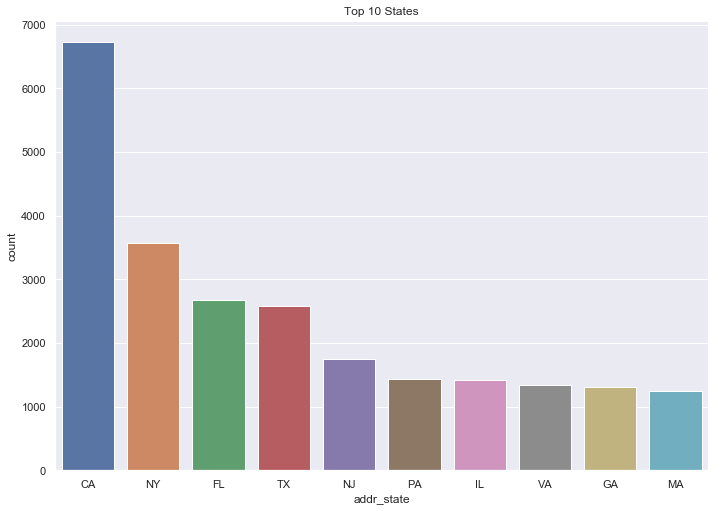

In [78]:
#Plotting below
sns.countplot(x='addr_state',data=data9,order=pd.value_counts(data9['addr_state']).iloc[:10].index).set(title='Top 10 States')

##### <i> Most of the loan applicants come from CA, NY, FL, TX, NJ </i>

### 14. dti - A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income

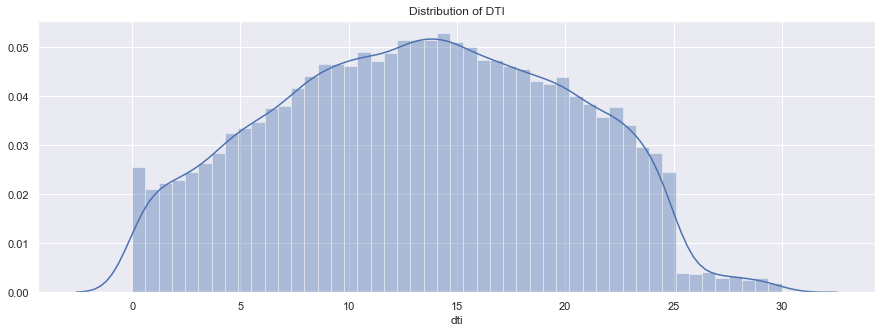

In [79]:
#Visulaizing this data
plt.figure(figsize=(15, 5))
sns.distplot(data9['dti'], hist_kws={'log':False})
plt.title('Distribution of DTI')
plt.show()

In [80]:
data9['dti'].describe()

count    37270.00000
mean        13.33342
std          6.64601
min          0.00000
25%          8.22000
50%         13.43000
75%         18.58750
max         29.99000
Name: dti, dtype: float64

##### <i> DTI Distribution seems like a normal distribution, and also we can infer that on an avg these loan applicants before applying the loan with us, are already paying 13% of their income to past loans </i>

In [81]:
# Listing down the final data frame post transformations and corections
data9.head()

,loan_amnt,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,term_new,int_rate_new,issue_d_yr,issue_d_mnth
0,5000,B,B2,10,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,860xx,AZ,27.65,36,10.65,2011,12
1,2500,C,C4,0,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,309xx,GA,1.00,60,15.27,2011,12
2,2400,C,C5,10,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,606xx,IL,8.72,36,15.96,2011,12
3,10000,C,C1,10,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,917xx,CA,20.00,36,13.49,2011,12
5,5000,A,A4,3,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,852xx,AZ,11.20,36,7.90,2011,12


#### It is now a clean dataset and can be called analytical dataset, out of the variables we see, they are all independent and we don't really have scope to cut down the variable list further by creating a dervied metric by clubbing 2 or more metrics

## Bi-variate Analysis

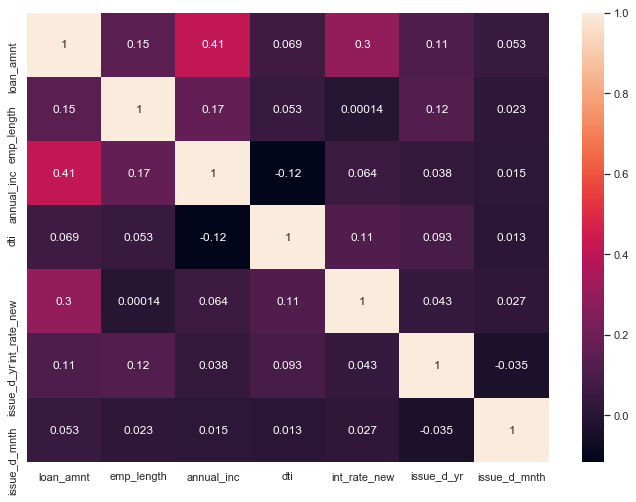

In [82]:
#Plotting a Correlation Matrix to analyse the relationship between 2 numerical variables
correlation_mat = data9.corr()
sns.heatmap(correlation_mat, annot = True)
plt.show()

#### We are not able to notice any strong correlation between 2 numerical variables from our dataset, but we see very small correlation between between loan_amt & annual_income, the correlation_factor is 0.4 and also between loan_amt and int_rate which is 0.3

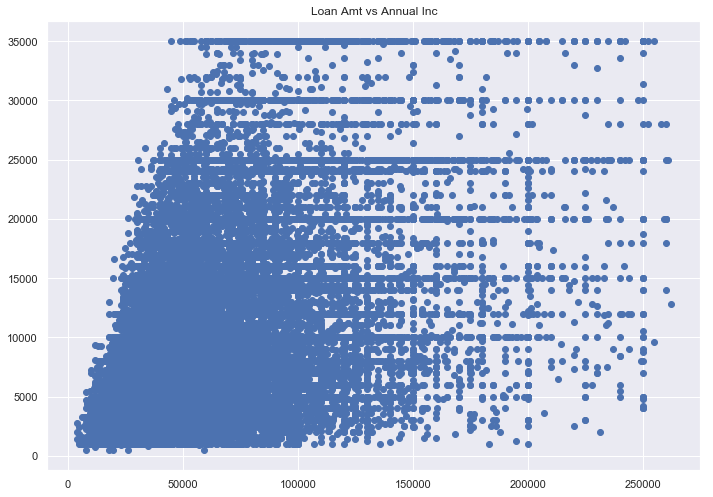

In [83]:
#Plotting some Scatter diagrams
plt.scatter(data9['annual_inc'], data9['loan_amnt'])
plt.title('Loan Amt vs Annual Inc')
plt.show()

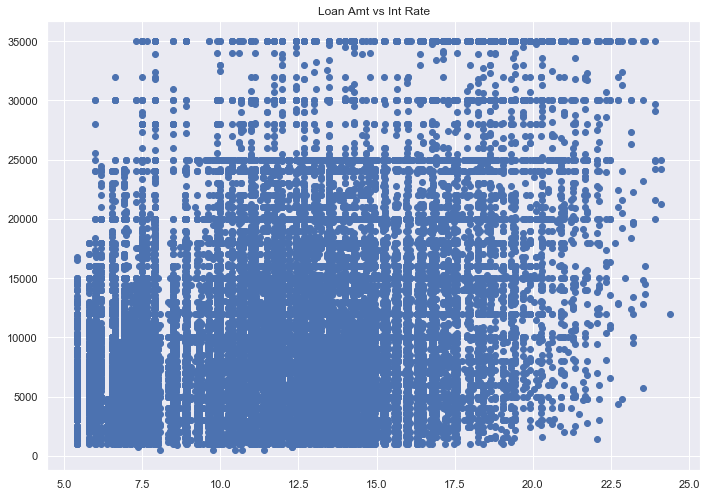

In [84]:
#Plotting some Scatter diagrams
plt.scatter(data9['int_rate_new'], data9['loan_amnt'])
plt.title('Loan Amt vs Int Rate')
plt.show()

#### We can start looking at the relationship between the loan_status and other variables

### 1. Loan Amount vs Loan Status

In [140]:
data9['loan_amnt'].describe()

count    37270.000000
mean     11057.159914
std       7294.139480
min        500.000000
25%       5406.250000
50%       9800.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [141]:
#https://pbpython.com/pandas-qcut-cut.html
cut_labels_5 = ['Very Low', 'Low', 'Medium', 'High','Very High']
cut_bins = [0, 5000, 10000, 20000, 30000, 35000]
data9['loan_amnt_bucket'] = pd.cut(data9['loan_amnt'], bins=cut_bins, labels=cut_labels_5)

C:\Users\Suraj MU\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, 'Charged Off Loans')

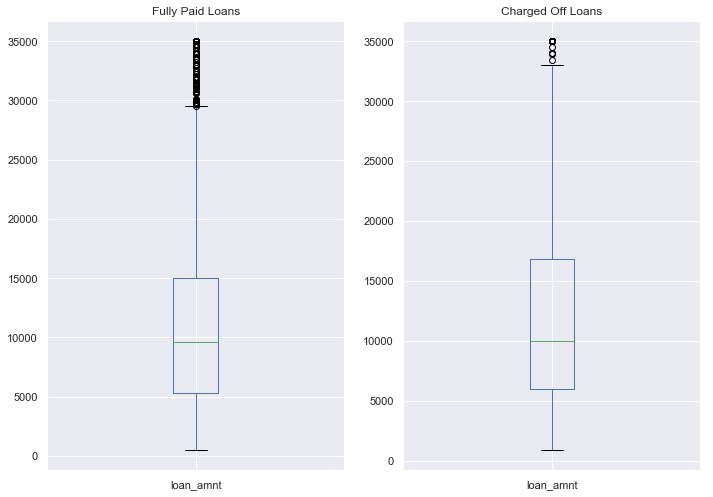

In [143]:
fig, axes = plt.subplots(1, 2)
datapaid = data9[data9['loan_status']=='Fully Paid']
datachrgd = data9[data9['loan_status']=='Charged Off']
datapaid.boxplot('loan_amnt', ax=axes[0])
datachrgd.boxplot('loan_amnt', ax=axes[1])
axes[0].set_title('Fully Paid Loans')
axes[1].set_title('Charged Off Loans')

In [144]:
datapaid['loan_amnt_bucket'].value_counts(normalize=True).sort_index()

Very Low     0.244890
Low          0.339624
Medium       0.313668
High         0.085925
Very High    0.015893
Name: loan_amnt_bucket, dtype: float64

In [145]:
datachrgd['loan_amnt_bucket'].value_counts(normalize=True).sort_index()

Very Low     0.226816
Low          0.292179
Medium       0.325885
High         0.123650
Very High    0.031471
Name: loan_amnt_bucket, dtype: float64

#### <i> As expected, Higher Loans are more prone to be Charged Off, 15% vs 9% <i>

### 2. Term vs Loan Status

In [96]:
datapaid['term_new'].value_counts(normalize=True).sort_index()

 36    0.784765
 60    0.215235
Name: term_new, dtype: float64

In [98]:
datachrgd['term_new'].value_counts(normalize=True).sort_index()

 36    0.569274
 60    0.430726
Name: term_new, dtype: float64

#### <i> As expected, Longer termed loans have higher chances for becoming a charged off loan </i>

C:\Users\Suraj MU\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


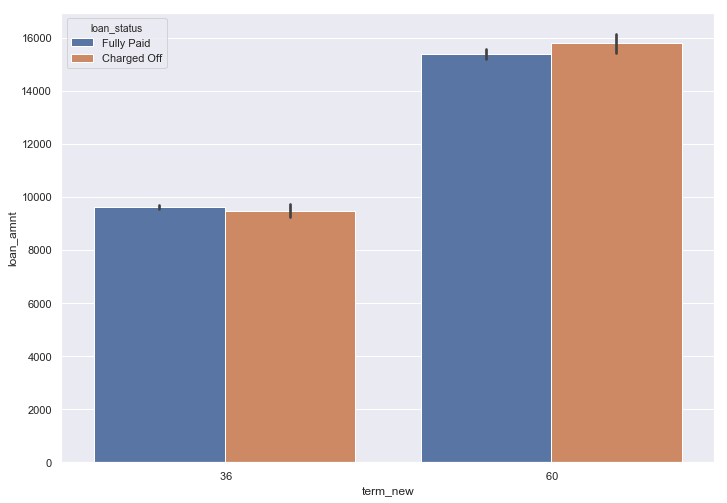

In [99]:
sns.barplot(x='term_new', y='loan_amnt', hue="loan_status", data=data9, estimator=np.mean)
plt.show()

#### As expected, 5 year termed loans have higher loan amt and chance of it being charged off is also high

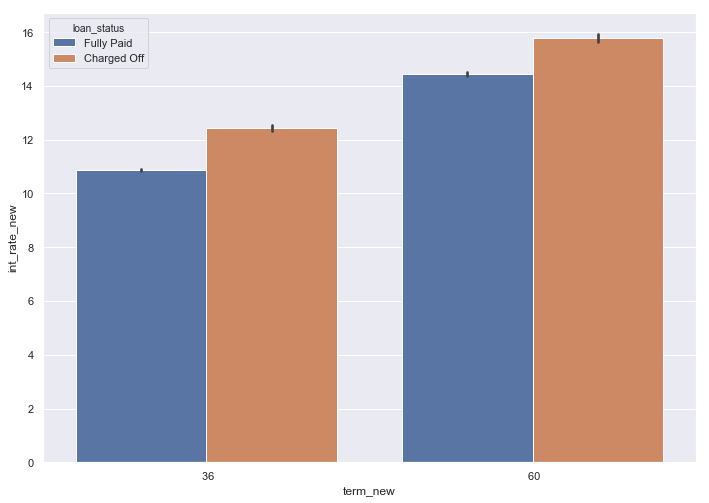

In [101]:
sns.barplot(x='term_new', y='int_rate_new', hue="loan_status", data=data9, estimator=np.mean)
plt.show()

#### On an Avg, Charged Off loans have a higher interest rate as compared to Full Paid loans, this indicates that the algorithm deciding on the interest rate is doing a good job by assigning higher interest rate to riskier loan

### 3. Employment Length vs Loan Status

In [156]:
#https://pbpython.com/pandas-qcut-cut.html
cut_labels_4 = ['Level 1', 'Level 2', 'Level 3', 'Level 4']
cut_bins = [0, 2, 4, 8, 10]
data9['el_bucket'] = pd.cut(data9['emp_length'], bins=cut_bins, labels=cut_labels_4)

C:\Users\Suraj MU\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [157]:
datapaid = data9[data9['loan_status']=='Fully Paid']
datachrgd = data9[data9['loan_status']=='Charged Off']

In [158]:
datapaid['el_bucket'].value_counts(normalize=True).sort_index()

Level 1    0.228021
Level 2    0.224528
Level 3    0.257683
Level 4    0.289768
Name: el_bucket, dtype: float64

In [159]:
datachrgd['el_bucket'].value_counts(normalize=True).sort_index()

Level 1    0.215508
Level 2    0.213395
Level 3    0.259032
Level 4    0.312064
Name: el_bucket, dtype: float64

#### We observe that the percentage of each of the loan statuses occuring across different tenures is very similar, hence we can assume that the employment length is not a influencing factor towards loan deafults

### 4.  Home Ownership vs Loan Status

In [104]:
datapaid['home_ownership'].value_counts(normalize=True)

RENT        0.479310
MORTGAGE    0.444389
OWN         0.073730
OTHER       0.002476
NONE        0.000094
Name: home_ownership, dtype: float64

In [105]:
datachrgd['home_ownership'].value_counts(normalize=True)

RENT        0.507635
MORTGAGE    0.414898
OWN         0.074115
OTHER       0.003352
Name: home_ownership, dtype: float64

In [172]:
data9['home_ownership'].value_counts(normalize=True)

RENT        0.483391
MORTGAGE    0.440140
OWN         0.073786
OTHER       0.002603
NONE        0.000080
Name: home_ownership, dtype: float64

#### <i> Customer being house owner or not is also not an influential factor in understanding if he is likely to default the loan <i>

### 5. Purpose vs Loan Status

In [197]:
datapaid['purpose'].value_counts(normalize=True)

debt_consolidation    0.467241
credit_card           0.136740
other                 0.097147
home_improvement      0.075204
major_purchase        0.058213
car                   0.040470
small_business        0.038683
wedding               0.025549
medical               0.017210
moving                0.014545
vacation              0.009342
house                 0.009060
educational           0.008276
renewable_energy      0.002320
Name: purpose, dtype: float64

In [196]:
datachrgd['purpose'].value_counts(normalize=True)

debt_consolidation    0.497020
other                 0.110428
credit_card           0.094600
small_business        0.085661
home_improvement      0.060149
major_purchase        0.038920
car                   0.028864
medical               0.018808
wedding               0.016946
moving                0.015456
house                 0.010801
educational           0.009683
vacation              0.009311
renewable_energy      0.003352
Name: purpose, dtype: float64

#### <i> If the purpose is small businesss, we see that this category's contribution is 8.5% in the charged off segment vs 3.8% in the paid segment, this can be because people don't have concrete business plans <i>

### 6. Address State vs Loan Status

In [114]:
adr_ls1 = datapaid['addr_state'].value_counts(normalize=True).sort_index()

[Text(0.5, 1.0, 'Statewise Contribution to Full Paid loans')]

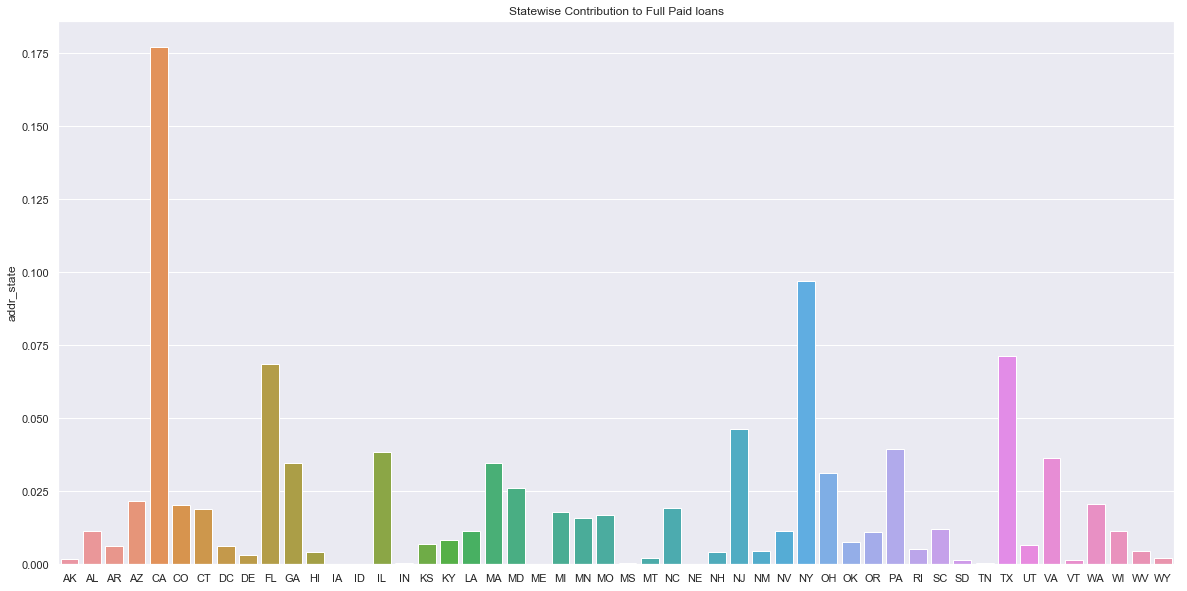

In [120]:
plt.figure(figsize=(20,10))
sns.barplot(adr_ls.index, adr_ls).set(title='Statewise Contribution to Full Paid loans')

In [131]:
adr_ls2 = datachrgd['addr_state'].value_counts(normalize=True).sort_index()

[Text(0.5, 1.0, 'Statewise Contribution to Charged Off loans')]

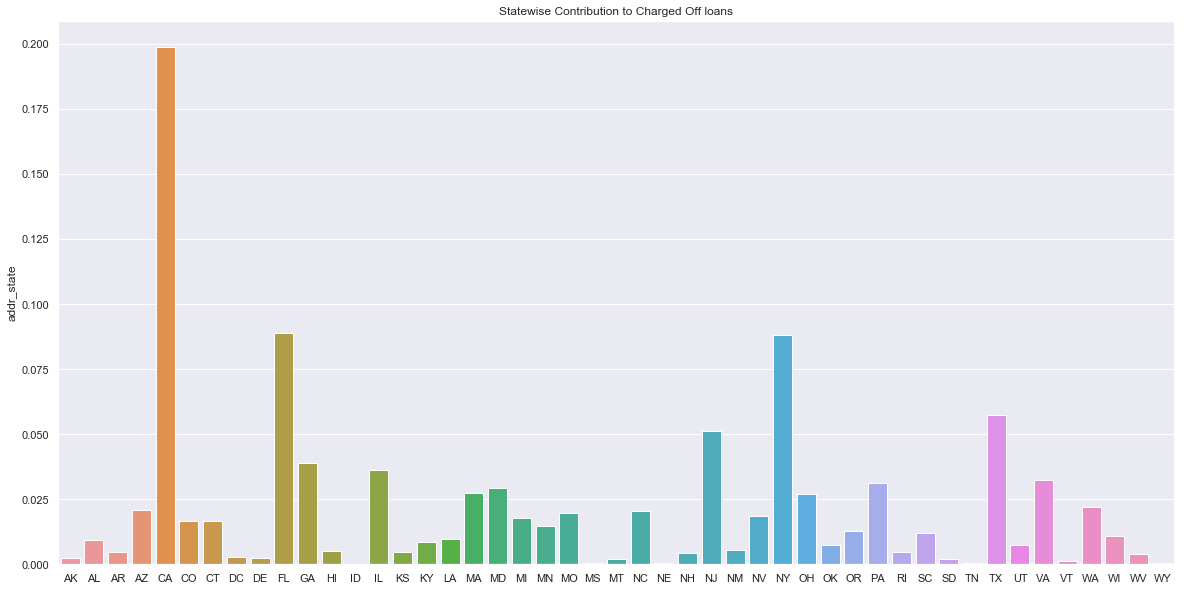

In [132]:
plt.figure(figsize=(20,10))
sns.barplot(adr_ls2.index, adr_ls2).set(title='Statewise Contribution to Charged Off loans')

#### If we observe both the graphs, feels like State also is not an influencing factor

### 7. DTI vs Loan Status

In [123]:
datapaid['dti_bin'] = pd.cut(datapaid['dti'], [0,5,10,15,20,25,30], labels=['0-5','5-10','10-15','15-20','20-25','25-30'])

C:\Users\Suraj MU\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [125]:
datapaid['dti_bin'].value_counts(normalize=True)

10-15    0.252361
15-20    0.228180
5-10     0.207777
20-25    0.167979
0-5      0.127456
25-30    0.016247
Name: dti_bin, dtype: float64

In [126]:
datachrgd['dti_bin'] = pd.cut(datachrgd['dti'], [0,5,10,15,20,25,30], labels=['0-5','5-10','10-15','15-20','20-25','25-30'])

C:\Users\Suraj MU\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [127]:
datachrgd['dti_bin'].value_counts(normalize=True)

10-15    0.251123
15-20    0.250187
20-25    0.199289
5-10     0.179454
0-5      0.105165
25-30    0.014783
Name: dti_bin, dtype: float64

#### From both the summarizations, feels like dti_bin also does not influence a loan default

### 8. Annual Incomes vs Loan Status

In [160]:
data9['annual_inc'].describe()

count     37270.000000
mean      66413.381415
std       36394.965691
min        4000.000000
25%       41000.000000
50%       59113.000000
75%       82000.000000
max      262000.000000
Name: annual_inc, dtype: float64

In [161]:
cut_labels_4 = ['Level 1', 'Level 2', 'Level 3', 'Level 4']
cut_bins = [4000, 40000, 80000, 120000, 262000]
data9['annua_inc_bucket'] = pd.cut(data9['annual_inc'], bins=cut_bins, labels=cut_labels_4)

C:\Users\Suraj MU\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [162]:
datapaid = data9[data9['loan_status']=='Fully Paid']
datachrgd = data9[data9['loan_status']=='Charged Off']

In [165]:
datapaid['annua_inc_bucket'].value_counts(normalize=True).sort_index()

Level 1    0.235932
Level 2    0.496222
Level 3    0.188313
Level 4    0.079532
Name: annua_inc_bucket, dtype: float64

In [167]:
datachrgd['annua_inc_bucket'].value_counts(normalize=True).sort_index()

Level 1    0.300186
Level 2    0.498510
Level 3    0.142458
Level 4    0.058845
Name: annua_inc_bucket, dtype: float64

In [168]:
data9['annua_inc_bucket'].value_counts(normalize=True).sort_index()

Level 1    0.245190
Level 2    0.496552
Level 3    0.181706
Level 4    0.076552
Name: annua_inc_bucket, dtype: float64

#### As its expected, customers with annual income below 40000, are more likely to default when compared to customers from other income levels

### 9. Verification Status vs Loan Status 

In [169]:
datapaid['verification_status'].value_counts(normalize=True).sort_index()

Not Verified       0.444138
Source Verified    0.251379
Verified           0.304483
Name: verification_status, dtype: float64

In [170]:
datachrgd['verification_status'].value_counts(normalize=True).sort_index()

Not Verified       0.380074
Source Verified    0.258473
Verified           0.361453
Name: verification_status, dtype: float64

In [171]:
data9['verification_status'].value_counts(normalize=True).sort_index()

Not Verified       0.434907
Source Verified    0.252401
Verified           0.312691
Name: verification_status, dtype: float64

#### <i> Its counter intuitive that in the charged off segment, Customers with verified status are more likely to default when compared to Customers who fully pay the loan as we see the above percentages are over indexing

In [178]:
datachrgd.groupby('verification_status')['dti'].median()

verification_status
Not Verified       14.400
Source Verified    13.135
Verified           15.340
Name: dti, dtype: float64

In [182]:
datapaid.groupby('verification_status')['dti'].median()

verification_status
Not Verified       12.97
Source Verified    12.65
Verified           14.29
Name: dti, dtype: float64

#### <i> The DTI ratios are high for customers who are likely to default and are also verified </i>

### 10. Loan Issued Date vs Loan Status

In [173]:
datapaid['issue_d_yr'].value_counts(normalize=True).sort_index()

2007    0.006426
2008    0.041066
2009    0.128119
2010    0.304922
2011    0.519467
Name: issue_d_yr, dtype: float64

In [174]:
datachrgd['issue_d_yr'].value_counts(normalize=True).sort_index()

2007    0.008007
2008    0.045810
2009    0.110242
2010    0.260335
2011    0.575605
Name: issue_d_yr, dtype: float64

#### As expected year has nothing to do with Loan defaults